In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df.head()

In [3]:
%matplotlib inline

In [3]:
train=pd.read_csv('heart.csv')

In [144]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
train.shape

(303, 14)

In [7]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

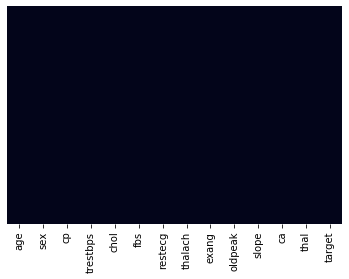

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

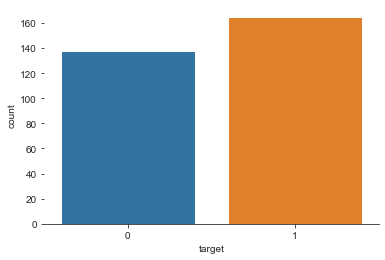

In [37]:
sns.set_style('ticks')
sns.countplot(x='target',data=train)
sns.despine(left=True)

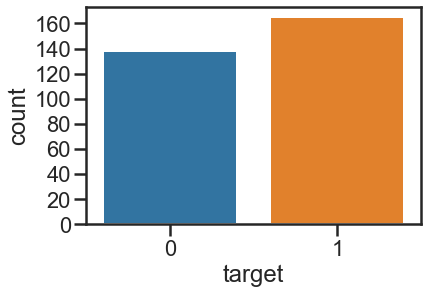

In [41]:
sns.set_style("ticks")
sns.countplot(x="target",data=train)
sns.set_context("paper")

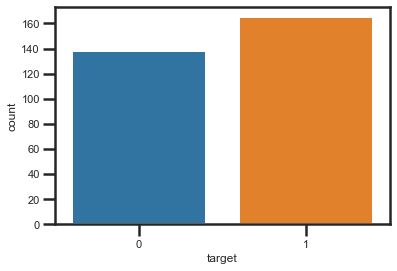

In [46]:
sns.set_style("ticks")
sns.set_context("poster",font_scale=0.5,rc={"grid.linewidth":1})
sns.countplot(x="target",data=train)

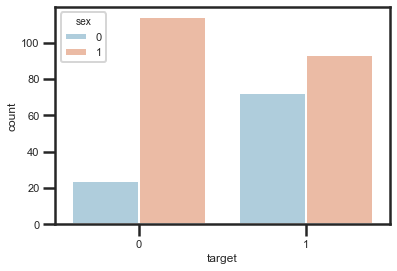

In [47]:
sns.set_style("ticks")
sns.set_context("poster",font_scale=0.5,rc={"grid.linewidth":1})
sns.countplot(x="target",hue='sex',data=train,palette='RdBu_r')

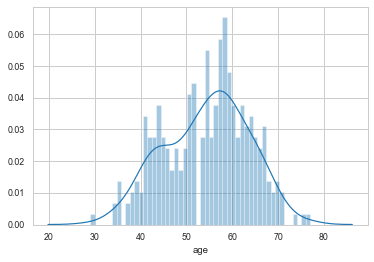

In [54]:
sns.set_style("whitegrid")
sns.set_context("paper",font_scale=1,rc={"grid.linewidth":1})
sns.distplot(train['age'],bins=50)

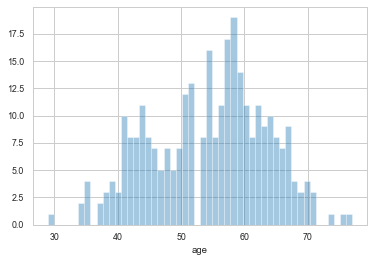

In [59]:
sns.distplot(train['age'],kde=False,bins=50)

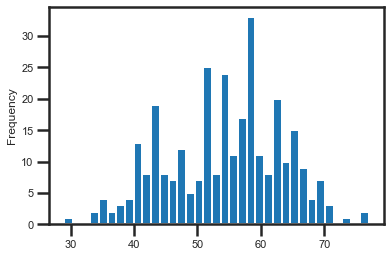

In [64]:
sns.set_style("ticks")
sns.set_context("poster",font_scale=0.5,rc={"grid.linewidth":1})
train['age'].plot.hist(bins=35)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


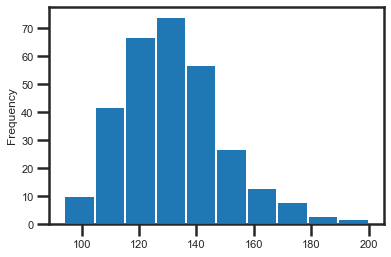

In [70]:
train['trestbps'].plot.hist()

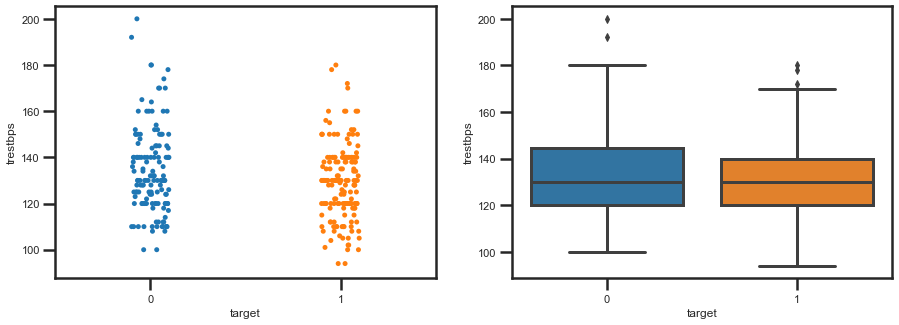

In [77]:
fig, axes= plt.subplots(1,2,figsize=(15,5))
sns.stripplot(ax=axes[0], x='target',y='trestbps',data=train)
sns.boxplot(ax=axes[1], x='target', y='trestbps', data=train)

In [6]:
def get_true_values(t):
    t['sex']=t.sex.map({1: 'Male',0: 'Female'})
    t['cp']=t.cp.map({0: 'Typical Angina',
                              1: 'Atypical Angina',
                              2: 'Non-Anginal Pain',
                              3: 'Asymptomatic'})
    t['fbs']=t.fbs.map({1: '>120 mg/dl',0: '<120 mg/dl'})
    t['restecg']=t.restecg.map({0: 'Normal',
                                        1: 'ST-T wave abnormality',
                                        2: 'Left Ventrical Hypertrophy'})
    t['exang'] =t.exang.map({1: 'Yes', 0: 'No'})
    t['slope'] =t.slope.map({   1: 'Upsloping',
                                2: 'Flat',
                                3: 'Downsloping'})
    t['trestbps'] =t.trestbps.map({0: 'Low Blood Pressure',
                                1: 'Normal Blood Pressure',
                                2 : 'High Blood Pressure'})
    return t
train2 = get_true_values(train2)
train2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,High Blood Pressure,233,>120 mg/dl,Normal,150,No,2.3,NaN,0,1,1
1,37,Male,Non-Anginal Pain,High Blood Pressure,250,<120 mg/dl,ST-T wave abnormality,187,No,3.5,NaN,0,2,1
2,41,Female,Atypical Angina,High Blood Pressure,204,<120 mg/dl,Normal,172,No,1.4,Flat,0,2,1
3,56,Male,Atypical Angina,Normal Blood Pressure,236,<120 mg/dl,ST-T wave abnormality,178,No,0.8,Flat,0,2,1
4,57,Female,Typical Angina,Normal Blood Pressure,354,<120 mg/dl,ST-T wave abnormality,163,Yes,0.6,Flat,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical Angina,High Blood Pressure,241,<120 mg/dl,ST-T wave abnormality,123,Yes,0.2,Upsloping,0,3,0
299,45,Male,Asymptomatic,Normal Blood Pressure,264,<120 mg/dl,ST-T wave abnormality,132,No,1.2,Upsloping,0,3,0
300,68,Male,Typical Angina,High Blood Pressure,193,>120 mg/dl,ST-T wave abnormality,141,No,3.4,Upsloping,2,3,0
301,57,Male,Typical Angina,High Blood Pressure,131,<120 mg/dl,ST-T wave abnormality,115,Yes,1.2,Upsloping,1,3,0


In [105]:
train2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,NaN,NaN,145,233,NaN,NaN,150,NaN,2.3,NaN,0,NaN,1
1,37,NaN,NaN,130,250,NaN,NaN,187,NaN,3.5,NaN,0,NaN,1
2,41,NaN,NaN,130,204,NaN,NaN,172,NaN,1.4,NaN,0,NaN,1
3,56,NaN,NaN,120,236,NaN,NaN,178,NaN,0.8,NaN,0,NaN,1
4,57,NaN,NaN,120,354,NaN,NaN,163,NaN,0.6,NaN,0,NaN,1


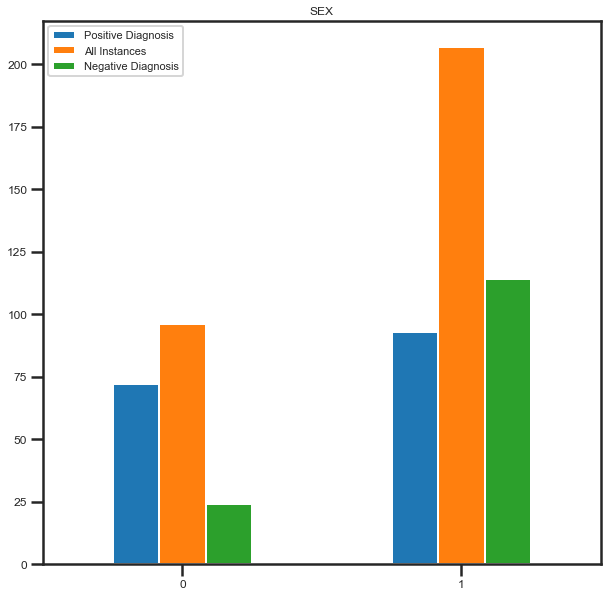

In [109]:
def get_bars(train, col):
    '''
    Plots bar graphs for categorical data.
    INPUT: DataFrame and column.
    OUTPUT: Plot
    '''
    #labels = ['Positive Diagnosis', 'All Instances', 'Negative Diagnosis']
    train_all = train
    train_yes = train[train['target'] == 1]
    train_no = train[train['target'] == 0]

    vc1 = pd.DataFrame(train_yes[col].value_counts(sort=False))
    vc1.rename(columns={col: 'Positive Diagnosis'}, inplace=True)

    vc2 = pd.DataFrame(train_all[col].value_counts(sort=False))
    vc2.rename(columns={col: 'All Instances'}, inplace=True)

    vc3 = pd.DataFrame(train_no[col].value_counts(sort=False))
    vc3.rename(columns={col: 'Negative Diagnosis'}, inplace=True)

    new_train = pd.concat([vc1, vc2, vc3], axis=1)
    new_train.plot.bar(figsize=(10,10),rot=0, fontsize=12, title=col.upper())
    plt.show()
get_bars(train, 'sex')

In [114]:
train_yes = train[train['target'] == 1]
train_no = train[train['target'] == 0]
train_all=train

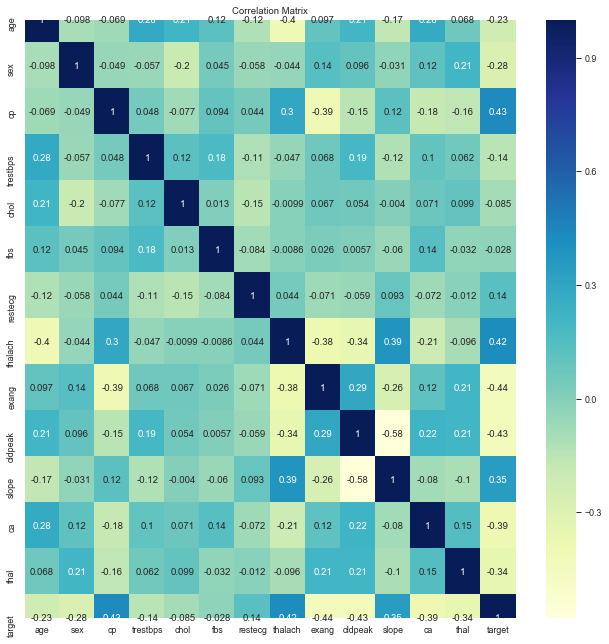

In [129]:
plt.figure(figsize=(11,11))
sns.heatmap(cbar=True,annot=True,data=train.corr(),cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [4]:
train2=pd.read_csv('heart.csv')

In [128]:
sns.set_style("whitegrid")
sns.set_context("paper",font_scale=1,rc={"grid.linewidth":1})

In [130]:
train2['trestbps'] = np.where(train['trestbps'].between(90,120), 'normal', train['trestbps'])

In [186]:
train2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,2,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,2,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,2,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,1,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,1,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,2,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,1,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,2,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,2,131,0,1,115,1,1.2,1,1,3,0


In [5]:
train2['trestbps'] = np.where(train2['trestbps'].between(0,90), 0, train2['trestbps'])
train2['trestbps'] = np.where(train2['trestbps'].between(90,120), 1, train2['trestbps'])
train2['trestbps'] = np.where(train2['trestbps'].between(120,250), 2, train2['trestbps'])

In [7]:
train=train2

In [8]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,High Blood Pressure,233,>120 mg/dl,Normal,150,No,2.3,NaN,0,1,1
1,37,Male,Non-Anginal Pain,High Blood Pressure,250,<120 mg/dl,ST-T wave abnormality,187,No,3.5,NaN,0,2,1
2,41,Female,Atypical Angina,High Blood Pressure,204,<120 mg/dl,Normal,172,No,1.4,Flat,0,2,1
3,56,Male,Atypical Angina,Normal Blood Pressure,236,<120 mg/dl,ST-T wave abnormality,178,No,0.8,Flat,0,2,1
4,57,Female,Typical Angina,Normal Blood Pressure,354,<120 mg/dl,ST-T wave abnormality,163,Yes,0.6,Flat,0,2,1


In [9]:
train.to_csv('heart2.csv')